 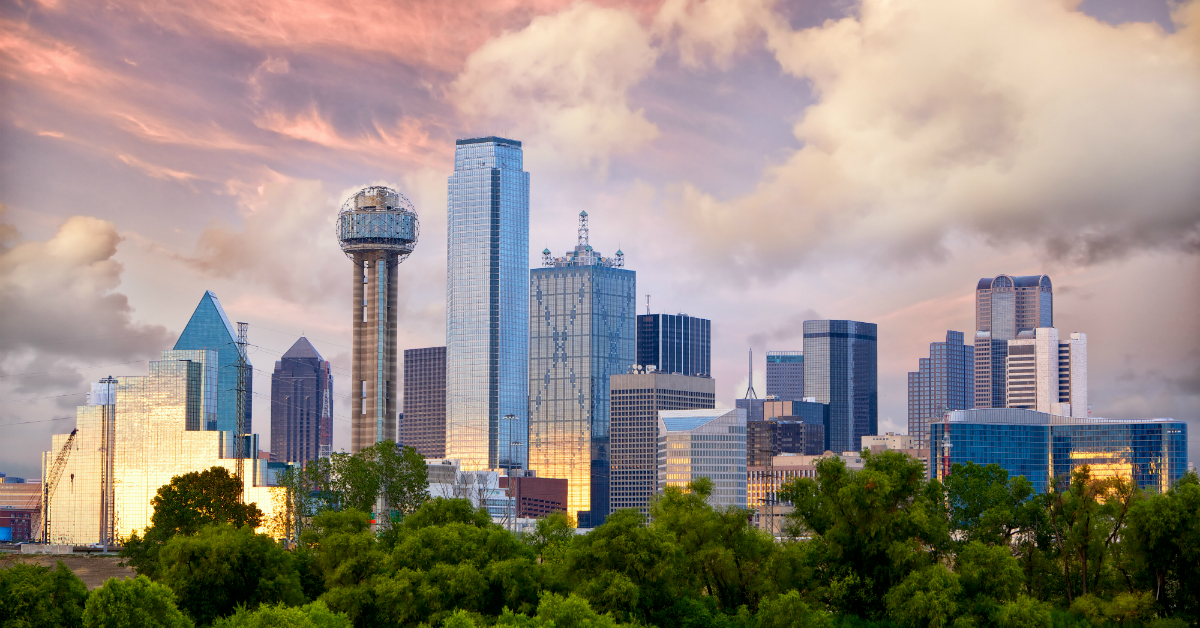

# <center>Market Analysis of Dallas</center> 


## <section id=home>Table of Contents</section>

### [1. Introduction](#one 'To Introduction')    
#### &nbsp;&nbsp;&nbsp;[1.1 Background](#oneone 'To Background')  
#### &nbsp;&nbsp;&nbsp;[1.2 Problem](#onetwo 'To Problem')  
#### &nbsp;&nbsp;&nbsp;[1.3 Interest](#onethree 'To Interest')  
### [2. Data Collection, Cleaning and Exploratory Analysis](#two 'To Section Two')    
#### &nbsp;&nbsp;&nbsp;[2.1 Data Sources](#twoone 'To Data Sources')  
#### &nbsp;&nbsp;&nbsp;[2.2 Wikipedia](#twotwo 'To Wikipedia')  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.1 Data Collection](#twotwoone 'To Data Collection')  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.2 Data Cleaning](#twotwotwo 'To Data Cleaning')  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.3 Exploratory Data Analysis](#twotwothree 'To Data Analysis')  
#### &nbsp;&nbsp;&nbsp;[2.3 Zip Codes](#twothree 'To Zip Codes')  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.1 Data Collection](#twothreeone 'To Data Collection')  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.2 Data Cleaning](#twothreetwo 'To Data Cleaning')  
#### &nbsp;&nbsp;&nbsp;[2.4 Foursquare Venues](#twofour 'To Foursquare Venues')  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4.1 Data Collection](#twofourone 'To Data Collection')  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4.2 Exploratory Data Analysis](#twofourtwo 'To Data Analysis')  
### [3. Methodology](#three 'To Methodology')    
### [4. Results](#four 'To Results')    
### [5. Discussion](#five 'To Discussion')    
### [6. Conclusion](#six 'To Conclusion')    


## <section id=one>[1. Introduction](#home "Return to TOC")</section>

### <section id=oneone> [1.1 Background](#home "Return to TOC")</section>

As part of the IBM Data Science Professional Certificate program, we explored New York City and Toronto venues to find hidden insights amongst the different venue locations. The final capstone project requires the learner to utilize data cleaning, preparation, visualization and modeling into their final report. The project will use the Foursquare API to build a data set with the different venues.

### <section id=onetwo> [1.2 Problem](#home "Return to TOC")</section>

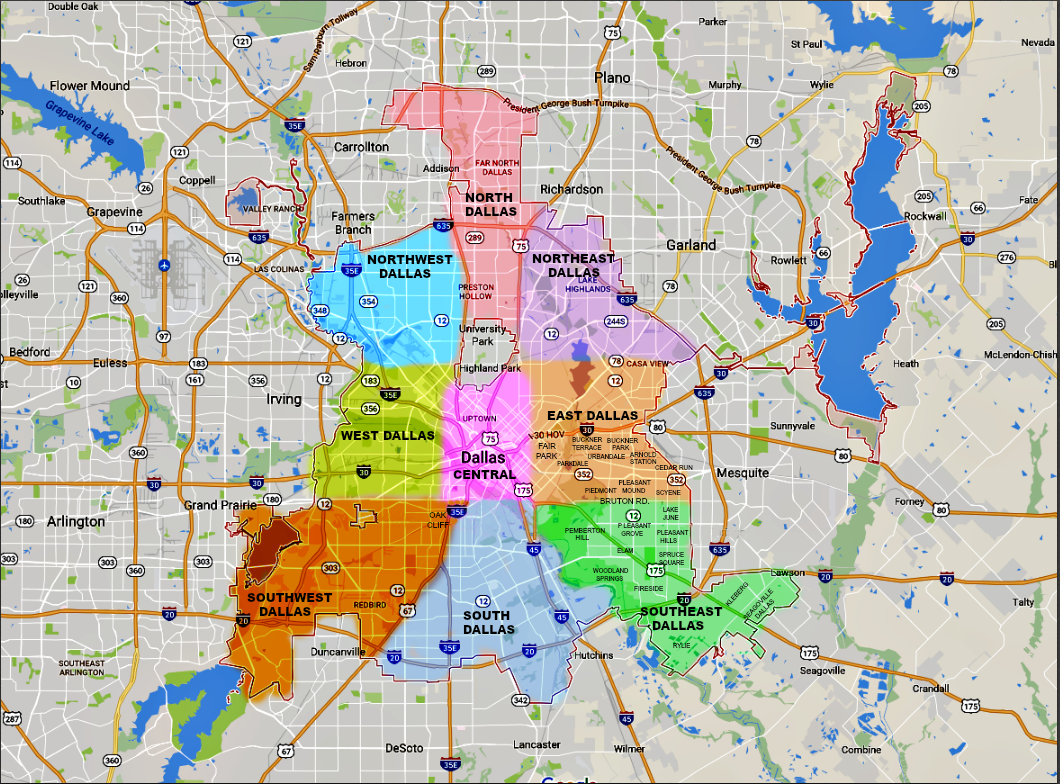

Dallas is the 9th populous city in America. With such a large population, new businesses may not know the prime locations to set up operations. Prime locations include spots where there are few competitors and/or large pedestrian traffic. This paper will seek to identify clusters of markets within the Dallas region.

### <section id=onethree>[1.3 Interest](#home 'Return to TOC')</section>

*What type of clients or groups of people would be interested in this project?* 

1. Companies looking to move operations into Texas. For a company, the environment they operate a business in is key to their success. This paper will explore and compare the different markets within Houston and Dallas, allowing key decision makers to determine the best location for new operations.

2. Investors looking to identify what kind of businesses are hot in specific regions in Dallas. The dataset provided by foursquare will allow us to identify popular venues in each neighborhood. 



## <section id=two> [2. Data Collection, Cleaning and Exploratory Analysis](#home "Return to TOC")</section> 

### <section id=twoone>[2.1 Data Sources](#home 'Return to TOC')</section>

We will web scrape Dallas neighborhood information from [wikipedia](https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Dallas "List of neighborhoods in Dallas
"), geolocation for different areas in dallas from [zip-codes.com](https://www.zip-codes.com/county/tx-dallas.asp "Dallas Zip Codes").

From here we will find top venues for each of the locations using the [foursquare api](https://foursquare.com/ "Foursquare").

First we will download and import packages for the project

In [1]:
!conda install beautifulsoup4 --yes
!conda install lxml --yes
!conda install html5lib
!conda install -c conda-forge geopy --yes
!pip install geocoder

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.8.2       |           py36_0         161 KB
    certifi-2019.11.28         |           py36_0         156 KB
    soupsieve-1.9.5            |           py36_0          61 KB
    openssl-1.1.1d             |       h7b6447c_3         3.7 MB
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    soupsieve:      1.9.5-py36_0                 

The following packages will b

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests #for retrieving web data
from bs4 import BeautifulSoup #
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium #Create visualizations
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import geocoder
import matplotlib.pyplot as plt 
import re
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from collections import Counter


### <section id=twotwo>[2.2 Wikipedia](#home 'Return to TOC')</section>

#### <section id=twotwoone>[2.2.1 Wikipedia Data Collection](#home 'Return to TOC')</section>

We will start by scraping neighborhood information in Dallas from wikipedia using  *requests*, *BeautifulSoup* and *Pandas* for later analysis. 

In [3]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Dallas")
soup = BeautifulSoup(res.content,'html.parser')
Dallas_Neighborhoods_Uncleaned = soup.find_all('table',{"class":"wikitable"})
print(len(Dallas_Neighborhoods_Uncleaned))

12


Lets store these tables into a dictionary of dataframes

In [4]:
Dallas_Neighborhoods_Table_Uncleaned = {'Table {}'.format(i): pd.read_html(str(Dallas_Neighborhoods_Uncleaned[i-1]), flavor='html5lib', header=0)[0] for i in range(1,len(Dallas_Neighborhoods_Uncleaned)+1 )}

We will check out how many columns there are for each of the neighborhoods.

In [5]:
for i in range(1,len(Dallas_Neighborhoods_Table_Uncleaned)+1):
    print ('There are ' + str(len(Dallas_Neighborhoods_Table_Uncleaned['Table {}'.format(i)].columns)) + ' columns in Table {}'.format(i))

There are 3 columns in Table 1
There are 3 columns in Table 2
There are 3 columns in Table 3
There are 3 columns in Table 4
There are 3 columns in Table 5
There are 3 columns in Table 6
There are 3 columns in Table 7
There are 3 columns in Table 8
There are 3 columns in Table 9
There are 3 columns in Table 10
There are 3 columns in Table 11
There are 3 columns in Table 12


When looking at the second table, we see that there is another area embedded from the webscraping.

In [6]:
Dallas_Neighborhoods_Table_Uncleaned['Table 1']

Downtown Dallas[1]            Downtown Dallas[1].1 Downtown Dallas[1].2
0                  NaN                 Baylor District                Mixed
1                  NaN                      The Cedars                Mixed
2                  NaN           Civic Center District                Mixed
3                  NaN            Dallas Arts District                Mixed
4                  NaN           Dallas Farmers Market                Mixed
5                  NaN                      Deep Ellum                Mixed
6                  NaN                 Design District                Mixed
7                  NaN            Main Street District                Mixed
8                  NaN                Reunion District           Commercial
9                  NaN             Riverfront District                Mixed
10                 NaN                      South Side                Mixed
11                 NaN  Thanksgiving Commercial Center           Commercial
12                 NaN                          Uptown                Mixed
13                 NaN                    Victory Park                Mixed
14                 NaN      West End Historic District                Mixed

#### <section id=twotwotwo>[2.2.2 Wikipedia Data Cleaning](#home 'Return to TOC')</section>

We will parse through the existing tables and validate that the values are null in the first column. If there is a table with non null values in the first column, we will assume that the value is another table and create a new table from here.   

In [7]:
#Will create a function that takes in unfiltered dictionary and returns dictionary of dataframes with first columns having value null 
def filter_areas(table_dict):
    filtered_dict = {}
    for table_index in table_dict: #check if first column contains all null values, continue if true, else split table at non null values
        
        table = table_dict[table_index]
        first_column = table[table.columns[0]]
    
        if (first_column.isnull().all()):
            filtered_dict[table_index] = table_dict[table_index]
            continue
        
        area2 = first_column.first_valid_index()
        first_table, second_table = table[:area2], table[area2:]
        filtered_dict[table_index], filtered_dict[table_index+' new'] = first_table, second_table
    return filtered_dict

In [8]:
filtered_table = filter_areas(Dallas_Neighborhoods_Table_Uncleaned)

In [9]:
filtered_table

{'Table 1':     Downtown Dallas[1]            Downtown Dallas[1].1 Downtown Dallas[1].2
 0                  NaN                 Baylor District                Mixed
 1                  NaN                      The Cedars                Mixed
 2                  NaN           Civic Center District                Mixed
 3                  NaN            Dallas Arts District                Mixed
 4                  NaN           Dallas Farmers Market                Mixed
 5                  NaN                      Deep Ellum                Mixed
 6                  NaN                 Design District                Mixed
 7                  NaN            Main Street District                Mixed
 8                  NaN                Reunion District           Commercial
 9                  NaN             Riverfront District                Mixed
 10                 NaN                      South Side                Mixed
 11                 NaN  Thanksgiving Commercial Center          

Next we will merge these information into a dataframe with the Dallas areas, neighborhoods and community type

In [10]:
for table_index in filtered_table:
    table = filtered_table[table_index]
    table_area = table.columns[0]
    table[table_area].fillna(table_area, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
filtered_table

{'Table 1':     Downtown Dallas[1]            Downtown Dallas[1].1 Downtown Dallas[1].2
 0   Downtown Dallas[1]                 Baylor District                Mixed
 1   Downtown Dallas[1]                      The Cedars                Mixed
 2   Downtown Dallas[1]           Civic Center District                Mixed
 3   Downtown Dallas[1]            Dallas Arts District                Mixed
 4   Downtown Dallas[1]           Dallas Farmers Market                Mixed
 5   Downtown Dallas[1]                      Deep Ellum                Mixed
 6   Downtown Dallas[1]                 Design District                Mixed
 7   Downtown Dallas[1]            Main Street District                Mixed
 8   Downtown Dallas[1]                Reunion District           Commercial
 9   Downtown Dallas[1]             Riverfront District                Mixed
 10  Downtown Dallas[1]                      South Side                Mixed
 11  Downtown Dallas[1]  Thanksgiving Commercial Center          

Now we will merge into 1 Dallas_DF dataframe

In [12]:
DF_DALLAS = pd.DataFrame(columns=['Area','Neighborhood','Community'])

for table_index in filtered_table:
    table = filtered_table[table_index]
    table.columns = DF_DALLAS.columns
    DF_DALLAS = DF_DALLAS.append(table, ignore_index=True)

In [13]:
DF_DALLAS.replace({'Downtown Dallas[1]':'Downtown Dallas'}, inplace=True)

In [14]:
DF_DALLAS.head(10)

Area           Neighborhood   Community
0  Downtown Dallas        Baylor District       Mixed
1  Downtown Dallas             The Cedars       Mixed
2  Downtown Dallas  Civic Center District       Mixed
3  Downtown Dallas   Dallas Arts District       Mixed
4  Downtown Dallas  Dallas Farmers Market       Mixed
5  Downtown Dallas             Deep Ellum       Mixed
6  Downtown Dallas        Design District       Mixed
7  Downtown Dallas   Main Street District       Mixed
8  Downtown Dallas       Reunion District  Commercial
9  Downtown Dallas    Riverfront District       Mixed

In [15]:
print ("There are %s Neighborhoods in Dallas" %DF_DALLAS.shape[0])

There are 205 Neighborhoods in Dallas


In [16]:
print('Dallas Area \t\t    Count\n',DF_DALLAS['Area'].value_counts(),sep = '\n')

Dallas Area 		    Count

Northeast Dallas              42
East Dallas                   41
Oak Cliff Area                22
Southeast Dallas              21
Downtown Dallas               15
North Dallas                  15
Old South Dallas/Fair Park    12
West Dallas                   11
Oak Lawn                      11
Northwest Dallas               7
Far South Dallas               3
South Central Dallas           2
Old East Dallas                1
Far North Dallas               1
Redbird                        1
Name: Area, dtype: int64


#### <section id=twotwothree>[2.2.3 Wikipedia Exploratory Data Analysis](#home)</section>

Now that we have our dataframe set up, we will begin some exploratory data analysis.

Let's check out the communities in Dallas

In [17]:
DF_DALLAS.groupby('Community').count()

Area  Neighborhood
Community                           
Commercial           8             8
Entertainment        3             3
Far North Dallas     1             1
Mixed               25            25
Old East Dallas      1             1
Redbird              1             1
Residential        165           165
Residential\         1             1

There are a few spots that we need to clean up. First we'll replace 'Residential\' with 'Residential' and investigate 'Far North Dallas' 'Old East Dallas' and 'Redbird', which may be the tables we created earlier

In [18]:
DF_DALLAS.replace({'Residential\\':'Residential' }, inplace=True)

In [19]:
DF_DALLAS.groupby('Community').count()

Area  Neighborhood
Community                           
Commercial           8             8
Entertainment        3             3
Far North Dallas     1             1
Mixed               25            25
Old East Dallas      1             1
Redbird              1             1
Residential        166           166

In [20]:
DF_DALLAS.loc[DF_DALLAS['Community'].isin(['Old East Dallas','Redbird','Far North Dallas'])]

Area      Neighborhood         Community
49    Old East Dallas   Old East Dallas   Old East Dallas
107  Far North Dallas  Far North Dallas  Far North Dallas
141           Redbird           Redbird           Redbird

Lets drop these rows and reindex our dataframe

In [21]:
DF_DALLAS.drop([49,107,141],inplace=True)

In [22]:
DF_DALLAS.reset_index(inplace=True)

In [23]:
DF_DALLAS.groupby('Community').count()

index  Area  Neighborhood
Community                               
Commercial         8     8             8
Entertainment      3     3             3
Mixed             25    25            25
Residential      166   166           166

We will one hot encode the community columns.

In [24]:
DF_DALLAS_ONEHOT = pd.get_dummies(DF_DALLAS['Community'], prefix="", prefix_sep="")
DF_DALLAS_ONEHOT[['Area','Neighborhood']] = DF_DALLAS[['Area','Neighborhood']] 
DF_DALLAS_ONEHOT.head()

Commercial  Entertainment  Mixed  Residential             Area  \
0           0              0      1            0  Downtown Dallas   
1           0              0      1            0  Downtown Dallas   
2           0              0      1            0  Downtown Dallas   
3           0              0      1            0  Downtown Dallas   
4           0              0      1            0  Downtown Dallas   

            Neighborhood  
0        Baylor District  
1             The Cedars  
2  Civic Center District  
3   Dallas Arts District  
4  Dallas Farmers Market

In [25]:
DF_DALLAS_ONEHOT.replace({0:np.nan}).groupby('Area').count()

Commercial  Entertainment  Mixed  Residential  \
Area                                                                        
Downtown Dallas                      2              0     13            0   
East Dallas                          0              1      1           39   
Far South Dallas                     0              0      0            3   
North Dallas                         2              0      0           13   
Northeast Dallas                     0              0      1           41   
Northwest Dallas                     2              0      2            3   
Oak Cliff Area                       0              1      0           21   
Oak Lawn                             2              0      7            2   
Old South Dallas/Fair Park           0              1      1           10   
South Central Dallas                 0              0      0            2   
Southeast Dallas                     0              0      0           21   
West Dallas                          0              0      0           11   

                            Neighborhood  
Area                                      
Downtown Dallas                       15  
East Dallas                           41  
Far South Dallas                       3  
North Dallas                          15  
Northeast Dallas                      42  
Northwest Dallas                       7  
Oak Cliff Area                        22  
Oak Lawn                              11  
Old South Dallas/Fair Park            12  
South Central Dallas                   2  
Southeast Dallas                      21  
West Dallas                           11

Lets try to visualize this information

In [26]:
DF_DALLAS_GROUPBY_AREA = DF_DALLAS_ONEHOT.replace({0:np.nan}).groupby('Area').count()

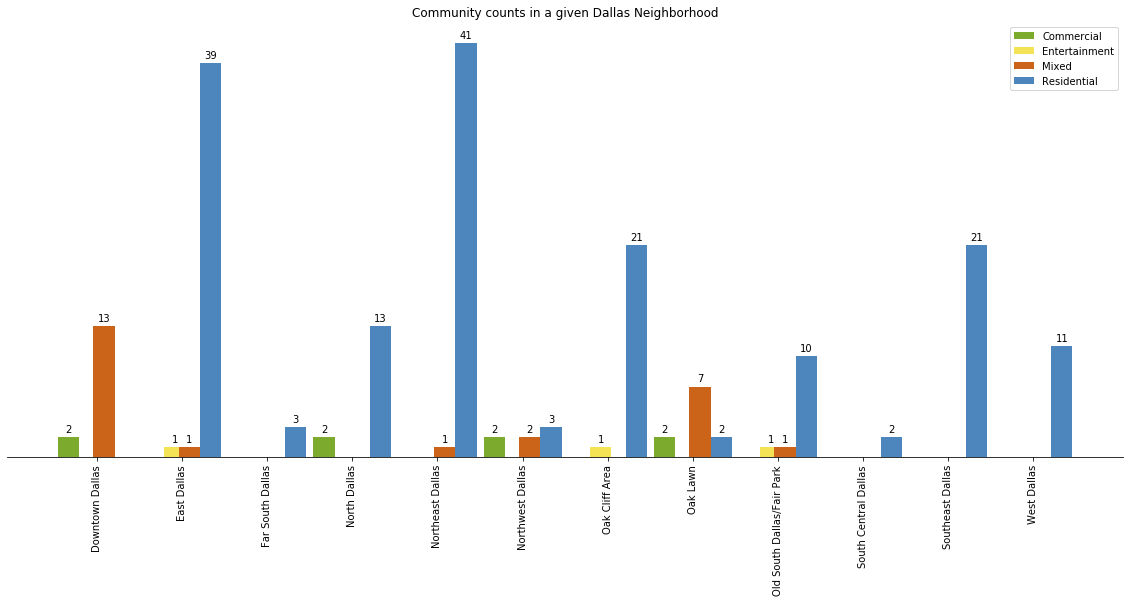

In [116]:
community_catagories = ['Commercial', 'Entertainment','Mixed','Residential']
numcategories = np.arange(len(DF_DALLAS_GROUPBY_AREA.index))
fig, ax = plt.subplots(figsize=(20,8))
w= 0.25
plt_commercial =  ax.bar(numcategories-4*w/3, DF_DALLAS_GROUPBY_AREA['Commercial'], width=w, color=['#7caa2d'],label=community_catagories[0],align='center')
plt_entertainment =  ax.bar(numcategories-w/3, DF_DALLAS_GROUPBY_AREA['Entertainment'], width=w, color=['#f5e356'],label=community_catagories[1],align='center')
plt_mixed =  ax.bar(numcategories+w/3, DF_DALLAS_GROUPBY_AREA['Mixed'], width=w, color=['#cb6318'],label=community_catagories[2],align='center')
plt_residential =  ax.bar(numcategories+4*w/3, DF_DALLAS_GROUPBY_AREA['Residential'], width=w, color=['#4d85bd'],label=community_catagories[3],align='center')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.xticks(numcategories,DF_DALLAS_GROUPBY_AREA.index, rotation='vertical')
plt.title("Community counts in a given Dallas Neighborhood")
def autolabel(rects):
    for rect in rects:
        height = np.round(rect.get_height(),decimals=2)
        if height == 0:
            continue
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x()+rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center',va='bottom')
autolabel(plt_commercial)
autolabel(plt_entertainment)
autolabel(plt_mixed)
autolabel(plt_residential)
plt.legend()
plt.savefig('wikipedia_analysis.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

Here we gain a little bit of insight as to what types of neighborhoods populate the different Dallas Areas.

### <section id=twothree>[2.3 Zip-Code](#home 'Return to TOC')</section>

#### <section id=twothreeone> [2.3.1 Zip-Code Data Collection](#home 'Return to TOC')</section>

We will narrow down our investigation to Downtown Dallas for market analysis. The analysis used can extend to the other neighborhoods of Dallas.

In [28]:
DF_DOWNTOWN_DALLAS = DF_DALLAS_ONEHOT.loc[DF_DALLAS_ONEHOT['Area'] == 'Downtown Dallas']
DF_DOWNTOWN_DALLAS.head()

Commercial  Entertainment  Mixed  Residential             Area  \
0           0              0      1            0  Downtown Dallas   
1           0              0      1            0  Downtown Dallas   
2           0              0      1            0  Downtown Dallas   
3           0              0      1            0  Downtown Dallas   
4           0              0      1            0  Downtown Dallas   

            Neighborhood  
0        Baylor District  
1             The Cedars  
2  Civic Center District  
3   Dallas Arts District  
4  Dallas Farmers Market

We'll need to get geo location Downtown Dallas if we want to perform analysis with the foursquare api. To even get the geolocation, we'll need to find the zip codes for all of the Neighborhoods downtown. First we'll use zip-codes.com to scrape the zip code and city name.

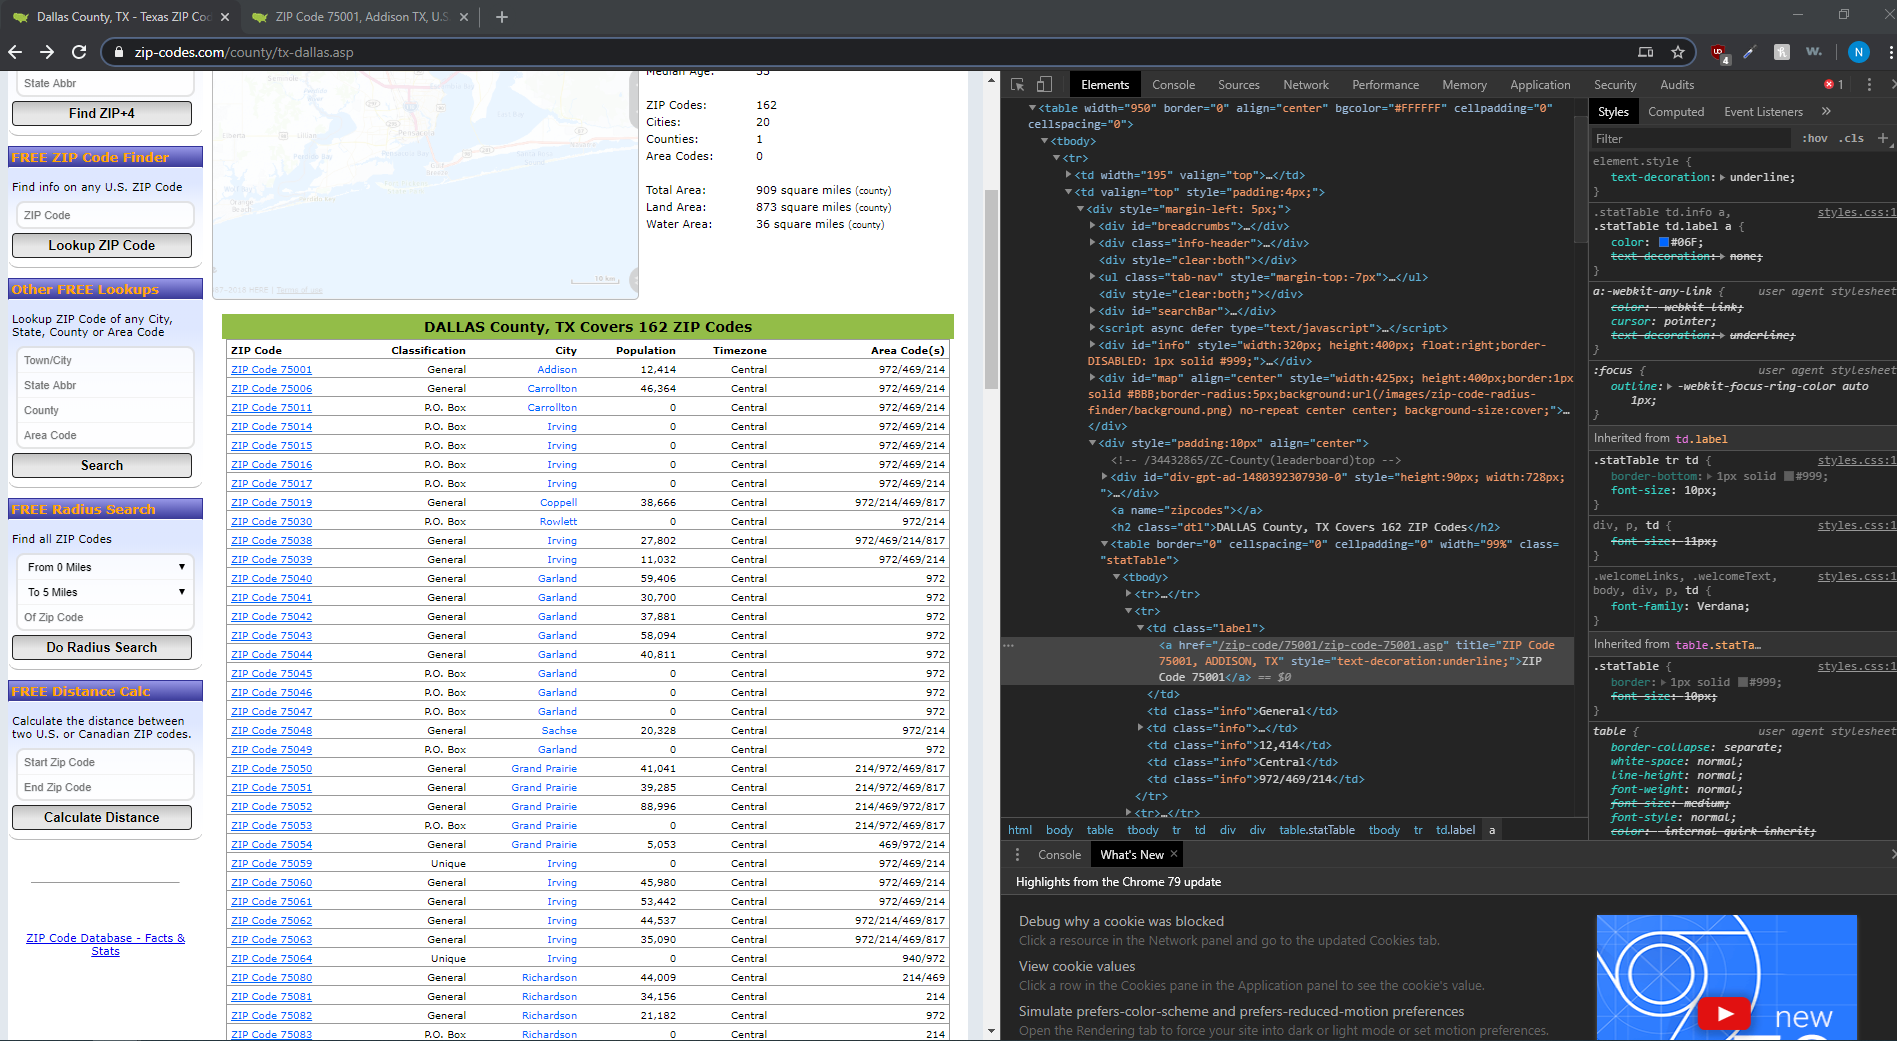

Now we have all of the links for the Dallas Zip codes stored in the variable zip_code_links. We'll need to extract the value and href of each link tag and put them into a dataframe if we want to use it later.

In [29]:
dallas_zip_home = "https://www.zip-codes.com/county/tx-dallas.asp"
zip_home = "https://www.zip-codes.com"
res = requests.get(dallas_zip_home)
soup = BeautifulSoup(res.content,'html.parser')
zip_code_links = [[link.get_text()[-5:],link.get("href")] for link in soup.find_all('a',{"href":re.compile(r'/zip-code/\d\d\d\d\d/zip-code-\d\d\d\d\d')})]
print(zip_code_links)

[['75001', '/zip-code/75001/zip-code-75001.asp'], ['75006', '/zip-code/75006/zip-code-75006.asp'], ['75011', '/zip-code/75011/zip-code-75011.asp'], ['75014', '/zip-code/75014/zip-code-75014.asp'], ['75015', '/zip-code/75015/zip-code-75015.asp'], ['75016', '/zip-code/75016/zip-code-75016.asp'], ['75017', '/zip-code/75017/zip-code-75017.asp'], ['75019', '/zip-code/75019/zip-code-75019.asp'], ['75030', '/zip-code/75030/zip-code-75030.asp'], ['75038', '/zip-code/75038/zip-code-75038.asp'], ['75039', '/zip-code/75039/zip-code-75039.asp'], ['75040', '/zip-code/75040/zip-code-75040.asp'], ['75041', '/zip-code/75041/zip-code-75041.asp'], ['75042', '/zip-code/75042/zip-code-75042.asp'], ['75043', '/zip-code/75043/zip-code-75043.asp'], ['75044', '/zip-code/75044/zip-code-75044.asp'], ['75045', '/zip-code/75045/zip-code-75045.asp'], ['75046', '/zip-code/75046/zip-code-75046.asp'], ['75047', '/zip-code/75047/zip-code-75047.asp'], ['75048', '/zip-code/75048/zip-code-75048.asp'], ['75049', '/zip-cod

Next we will add this information into a dataframe

In [30]:
zip_code_df = pd.DataFrame(zip_code_links, columns=['Zip Code','Link'])
zip_code_df.head()

Zip Code                                Link
0    75001  /zip-code/75001/zip-code-75001.asp
1    75006  /zip-code/75006/zip-code-75006.asp
2    75011  /zip-code/75011/zip-code-75011.asp
3    75014  /zip-code/75014/zip-code-75014.asp
4    75015  /zip-code/75015/zip-code-75015.asp

For each of the links, we will extract the city name and the latitude and longitude of the city

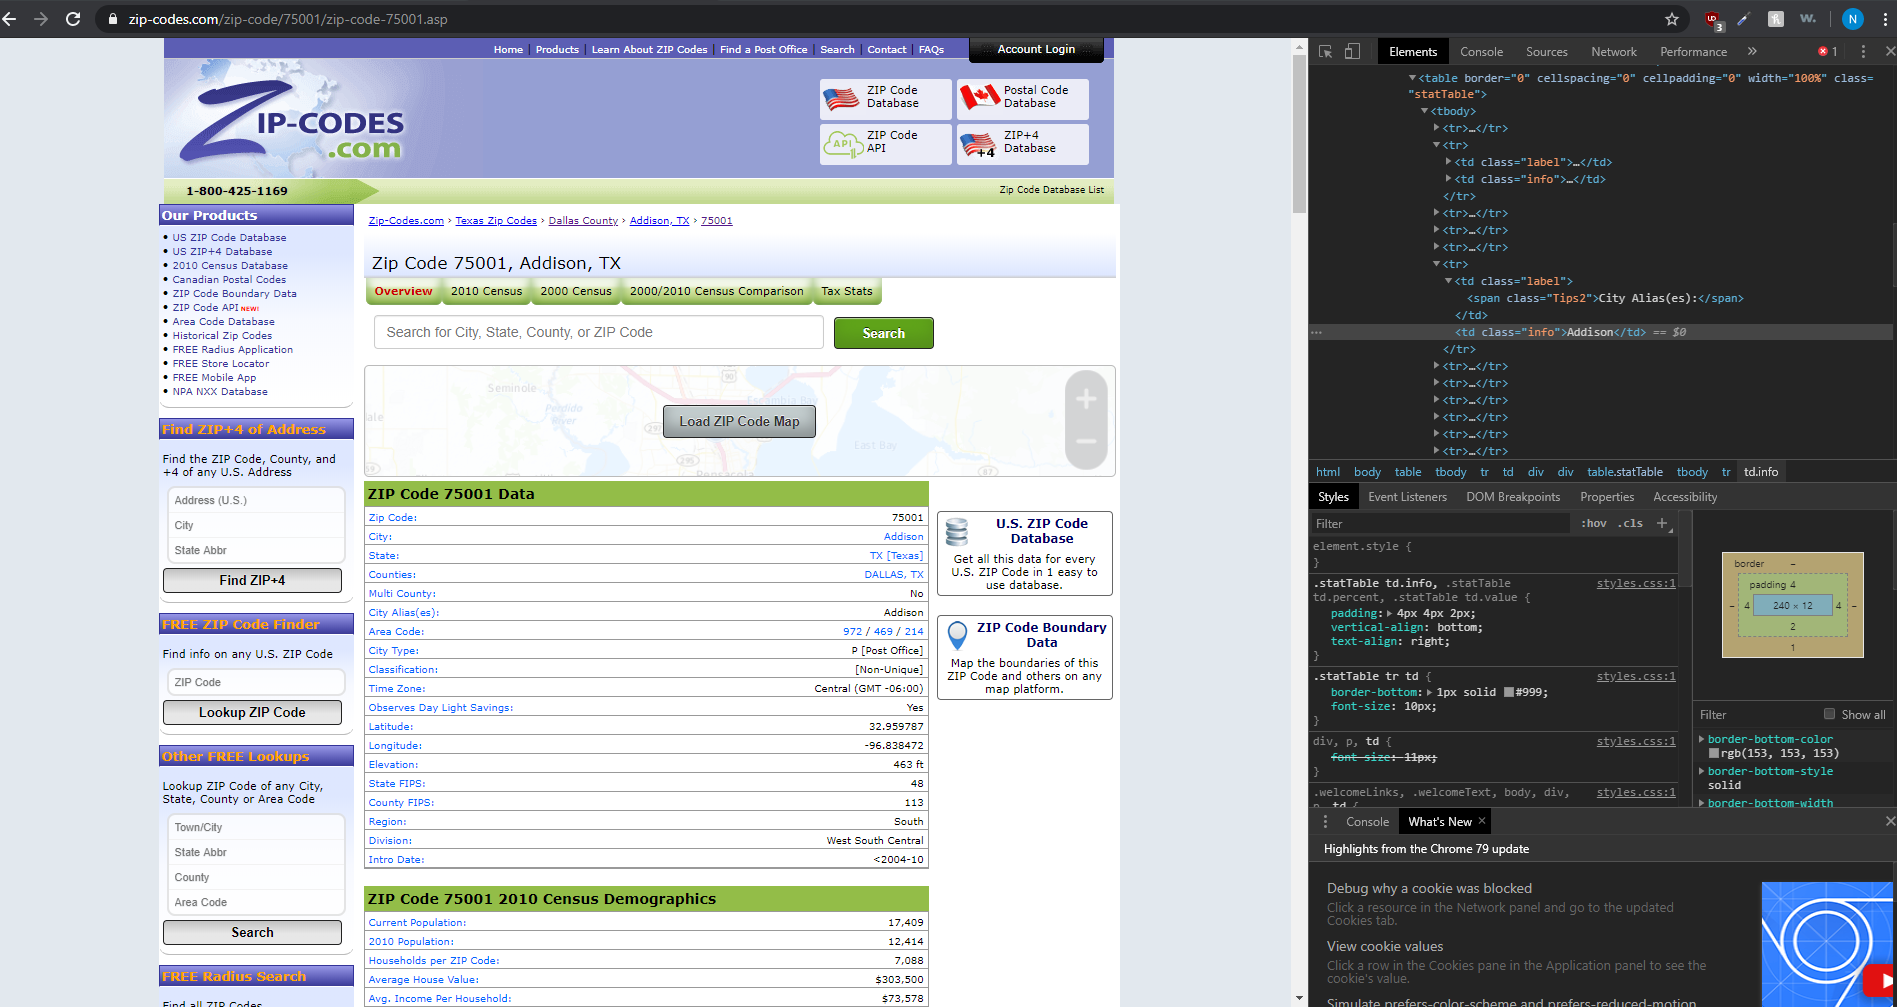

Next we will go through each link and attempt to find the city alias for each zip code.

In [31]:
test_link = zip_home + zip_code_df['Link'][0] #test a link from the dataframe
res = requests.get(test_link)
soup = BeautifulSoup(res.content,'html.parser')

The code below will find the city name by the searching for the a tag with href='/city/\*' where \* represents the city name. 
The latitude and longitude will be found using regex as well, searching for text of the form (-)xx.xx(xxxx) where () represents optional values.

In [32]:
city = soup.find('a',{"href":re.compile('/city/.*')}).get_text()[1:]
lat_long = soup.find_all(text=re.compile('^-?\d\d\.\d{4,6}$'))
# print(lat_long)
print("The city name is "+ city + " with latitude: "+ lat_long[0] +" and longitude: "+lat_long[1])

The city name is Addison, TX with latitude: 32.959787 and longitude: -96.838472


We will see later that there are a few cases where the link page does not contain the href=/city/* and so we will modify our query to search for the tag with the 'City Alias(es):' value and find the next child to retrieve the city name. We will repeat similar procedures for the latitude and longitude.

In [33]:
def find_value_by_label(page,label):  #find the next child tag based on the label
    #page should be a beautifulsoup object
    return page.find('td',text=re.compile(label)).next_sibling.get_text()

In [34]:
city_name = find_value_by_label(soup, 'City Alias')
latitude = find_value_by_label(soup, 'Latitude')
longitude = find_value_by_label(soup, 'Longitude')
print("The name of the city: %s with lat/lng: %s, %s" % (city_name,latitude,longitude))

The name of the city: Addison with lat/lng: 32.959787, -96.838472


We will add empty latitude and longitude columns so that we can add values to them later

In [35]:
zip_code_df = pd.concat([zip_code_df, pd.DataFrame(columns=['Name','Latitude','Longitude'])], sort=False)

In [36]:
zip_code_df.head()

Zip Code                                Link Name Latitude Longitude
0    75001  /zip-code/75001/zip-code-75001.asp  NaN      NaN       NaN
1    75006  /zip-code/75006/zip-code-75006.asp  NaN      NaN       NaN
2    75011  /zip-code/75011/zip-code-75011.asp  NaN      NaN       NaN
3    75014  /zip-code/75014/zip-code-75014.asp  NaN      NaN       NaN
4    75015  /zip-code/75015/zip-code-75015.asp  NaN      NaN       NaN

Now we will iterate through the links and add these to the existing dataframe

In [37]:
for index, row in zip_code_df['Link'].iteritems():
    current_link = zip_home + row
    current_res = requests.get(current_link)
    current_soup = BeautifulSoup(current_res.content,'html.parser')
    
    current_name = find_value_by_label(current_soup, 'City Alias')
    current_lat = find_value_by_label(current_soup, 'Latitude')
    current_lng = find_value_by_label(current_soup, 'Longitude')

    zip_code_df['Name'][index] = current_name
    zip_code_df['Latitude'][index] = float(current_lat)
    zip_code_df['Longitude'][index] = float(current_lng)
    
    print('For %s Successfully added %s, %s, %s to the dataframe' %(zip_code_df['Zip Code'][index], current_name, current_lat, current_lng))
print("Finished adding lat/lng info")

For 75001 Successfully added Addison, 32.959787, -96.838472 to the dataframe
For 75006 Successfully added Carrollton, 32.951364, -96.891487 to the dataframe
For 75011 Successfully added Carrollton, 32.9538, -96.8902 to the dataframe
For 75014 Successfully added Irving, 32.8139, -96.9488 to the dataframe
For 75015 Successfully added Irving, 32.8139, -96.9488 to the dataframe
For 75016 Successfully added Irving, 32.8139, -96.9488 to the dataframe
For 75017 Successfully added Irving, 32.8139, -96.9488 to the dataframe
For 75019 Successfully added Coppell, 32.9601, -96.982656 to the dataframe
For 75030 Successfully added Rowlett, 32.9026, -96.5636 to the dataframe
For 75038 Successfully added Irving, 32.875007, -96.98328 to the dataframe
For 75039 Successfully added Irving, 32.881308, -96.944848 to the dataframe
For 75040 Successfully added Garland, 32.933134, -96.621293 to the dataframe
For 75041 Successfully added Garland, 32.875319, -96.647984 to the dataframe
For 75042 Successfully add

In [38]:
zip_code_df.head()

Zip Code                                Link        Name Latitude Longitude
0    75001  /zip-code/75001/zip-code-75001.asp     Addison  32.9598  -96.8385
1    75006  /zip-code/75006/zip-code-75006.asp  Carrollton  32.9514  -96.8915
2    75011  /zip-code/75011/zip-code-75011.asp  Carrollton  32.9538  -96.8902
3    75014  /zip-code/75014/zip-code-75014.asp      Irving  32.8139  -96.9488
4    75015  /zip-code/75015/zip-code-75015.asp      Irving  32.8139  -96.9488

In [39]:
zip_code_df.shape

(162, 5)

#### <section id=twothreetwo>[2.3.2 Zip-Code Data Cleaning](#home 'Return to TOC')</section>

Lets check to see if there are any columns with lat = 0 or null

In [40]:
zip_code_df[zip_code_df['Latitude']== 0]

Zip Code                                Link    Name Latitude Longitude
26    75059  /zip-code/75059/zip-code-75059.asp  Irving        0         0
31    75064  /zip-code/75064/zip-code-75064.asp  Irving        0         0

Here we see 2 entries with 0 lat 0 lng. Lets drop these rows.

In [41]:
zip_code_df.drop([26,31],inplace=True)

In [42]:
zip_code_df.reset_index(inplace=True)

In [43]:
zip_code_df[zip_code_df['Latitude']==0]

Empty DataFrame
Columns: [index, Zip Code, Link, Name, Latitude, Longitude]
Index: []

In [44]:
zip_code_df[zip_code_df['Latitude']== np.nan]

Empty DataFrame
Columns: [index, Zip Code, Link, Name, Latitude, Longitude]
Index: []

### <section id=twofour>[2.4 Foursquare Venues](#home 'Return to TOC')</section>

#### <section id=twofourone>[2.4.1 Foursquare API Venue Data Collection](#home 'Return to TOC')</section>

We will find popular venues using the geolocations for each zip code. Hopefully we have enough information after this to make an informed decision

##### Connecting to Foursquare API

In [45]:

VERSION = '20180605' # Foursquare API version

print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:


#### Test venue collection on first city

In [46]:
test_name = zip_code_df.loc[5,'Name']
test_lat = zip_code_df.loc[5,'Latitude']
test_lng = zip_code_df.loc[5,'Longitude']

print('Latitude and longitude values of {} are {}, {}.'.format(test_name, 
                                                               test_lat, 
                                                               test_lng))

Latitude and longitude values of Irving are 32.8139, -96.9488.


In [47]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    test_lat,
    test_lng,
    radius,
    LIMIT
    )
# print(url)


In [48]:
res = requests.get(url).json()
res

{'meta': {'code': 200, 'requestId': '5e32325e71c428001b69dfa6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Irving Heritage District',
  'headerFullLocation': 'Irving Heritage District, Irving',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': 32.8184000045, 'lng': -96.94345562283587},
   'sw': {'lat': 32.809399995499994, 'lng': -96.95414437716414}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5c6b78f964a520ff2e29e3',
       'name': "Joe's Coffee Shop",
       'location': {'address': '425 W Irving Blvd',
        'lat': 32.81421130810597,
        'lng': -96.95074985514185,
        'labeledLatLngs': [{'label': 'displa

Now we will create a function that will make a request for all of the latitudes in the dataframe and collect the top venues. First we will borrow the **get_category_type** function from foursquare

In [49]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We will now extract the necessary data from the json and move it into a pandas dataframe

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
#         print(requests.get(url).json())
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
dallas_venues = getNearbyVenues(names=zip_code_df['Name'], latitudes=zip_code_df['Latitude'], longitudes=zip_code_df['Longitude'])

Addison
Carrollton
Carrollton
Irving
Irving
Irving
Irving
Coppell
Rowlett
Irving
Irving
Garland
Garland
Garland
Garland
Garland
Garland
Garland
Garland
SachseGarland
Garland
Grand Prairie
Grand Prairie
Grand Prairie
Grand Prairie
Grand Prairie
Irving
Irving
Irving
Irving
Richardson
Richardson
Richardson
Richardson
Richardson
Rowlett
Rowlett
Coppell
Cedar Hill
Cedar Hill
Desoto
Duncanville
Desoto
Lancaster
Duncanville
Duncanville
Hutchins
Lancaster
Mesquite
Mesquite
SeagovilleCombine
Wilmer
Balch SpringsMesquite
MesquiteBalch Springs
SunnyvaleMesquite
Mesquite
Mesquite
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
DallasFarmers BranchFarmers Brnch
Dallas
Dallas
Dallas
Dallas
DallasFarmers BranchFarmers Brnch
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
Dallas
DallasFarmers BranchFarmers BrnchNorth Branch
Dallas
Dallas
Dallas
Dallas
Dallas
Dal

In [52]:
print(dallas_venues.shape)
dallas_venues.head()

(5994, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Addison              32.959787              -96.838472   
1      Addison              32.959787              -96.838472   
2      Addison              32.959787              -96.838472   
3      Addison              32.959787              -96.838472   
4      Addison              32.959787              -96.838472   

                       Venue  Venue Latitude  Venue Longitude  \
0                   La Spiga       32.958278       -96.837417   
1  Cindi's N.Y. Delicatessen       32.961864       -96.838873   
2      Enterprise Rent-A-Car       32.960673       -96.838102   
3                Dallas Desk       32.957869       -96.838840   
4          Tone Shop Guitars       32.958846       -96.838999   

           Venue Category  
0                  Bakery  
1                   Diner  
2     Rental Car Location  
3  Furniture / Home Store  
4             Music Store

In [53]:
print('There are {} uniques categories.'.format(len(dallas_venues['Venue Category'].unique())))

There are 209 uniques categories.


#### <section id=twofourtwo>[2.4.2 Foursquare API Venue Exploratory Analysis](#home 'Return to TOC')</section>

First we will one hot encode the Restaurant category for ease of analysis

In [54]:
dallas_venues_onehot= pd.get_dummies(dallas_venues[['Venue Category']], prefix="", prefix_sep="")
dallas_venues_onehot[['Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude']] = dallas_venues[['Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude']]
fixed_columns = list(dallas_venues_onehot.columns[-3:]) + list(dallas_venues_onehot.columns[:-3])
dallas_venues_onehot = dallas_venues_onehot[fixed_columns]

In [55]:
dallas_venues_onehot.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  ATM  Airport  \
0      Addison              32.959787              -96.838472    0        0   
1      Addison              32.959787              -96.838472    0        0   
2      Addison              32.959787              -96.838472    0        0   
3      Addison              32.959787              -96.838472    0        0   
4      Addison              32.959787              -96.838472    0        0   

   Airport Lounge  Airport Service  American Restaurant  Antique Shop  \
0               0                0                    0             0   
1               0                0                    0             0   
2               0                0                    0             0   
3               0                0                    0             0   
4               0                0                    0             0   

   Aquarium  ...  Trail  Vegetarian / Vegan Restaurant  Video Game Store  \
0         0  ...      0                              0                 0   
1         0  ...      0                              0                 0   
2         0  ...      0                              0                 0   
3         0  ...      0                              0                 0   
4         0  ...      0                              0                 0   

   Video Store  Vietnamese Restaurant  Warehouse Store  Water Park  Wine Bar  \
0            0                      0                0           0         0   
1            0                      0                0           0         0   
2            0                      0                0           0         0   
3            0                      0                0           0         0   
4            0                      0                0           0         0   

   Wine Shop  Wings Joint  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
4          0            0  

[5 rows x 212 columns]

In [56]:
dallas_venues_onehot.shape

(5994, 212)

Next we will group this dataframe by Latitude, taking the mean of the restaurant occurance. We cannot rely on the Neighborhood because there are several Neighborhoods with multiple Latitudes.

In [57]:
dallas_venues_grouped = dallas_venues_onehot.groupby('Neighborhood Latitude').mean().reset_index()

In [58]:
dallas_venues_grouped.head()

Neighborhood Latitude  Neighborhood Longitude  ATM  Airport  \
0              32.572580              -96.744223  0.0      0.0   
1              32.588300              -96.955900  0.0      0.0   
2              32.589800              -96.856700  0.0      0.0   
3              32.594994              -97.046767  0.0      0.0   
4              32.626675              -96.762898  0.0      0.0   

   Airport Lounge  Airport Service  American Restaurant  Antique Shop  \
0             0.0              0.0                  0.0           0.0   
1             0.0              0.0                  0.0           0.0   
2             0.0              0.0                  0.0           0.0   
3             0.0              0.0                  0.0           0.0   
4             0.0              0.0                  0.0           0.0   

   Aquarium  Arcade  ...  Trail  Vegetarian / Vegan Restaurant  \
0       0.0     0.0  ...    0.0                            0.0   
1       0.0     0.0  ...    0.0                            0.0   
2       0.0     0.0  ...    0.0                            0.0   
3       0.0     0.0  ...    0.0                            0.0   
4       0.0     0.0  ...    0.0                            0.0   

   Video Game Store  Video Store  Vietnamese Restaurant  Warehouse Store  \
0               0.0          0.0                    0.0              0.0   
1               0.0          0.0                    0.0              0.0   
2               0.0          0.0                    0.0              0.0   
3               0.0          0.0                    0.0              0.0   
4               0.0          0.0                    0.0              0.0   

   Water Park  Wine Bar  Wine Shop  Wings Joint  
0         0.0       0.0        0.0          0.0  
1         0.0       0.0        0.0          0.0  
2         0.0       0.0        0.0          0.0  
3         0.0       0.0        0.0          0.0  
4         0.0       0.0        0.0          0.0  

[5 rows x 211 columns]

In [59]:
dallas_venues_grouped.shape

(94, 211)

Lets try and find the top 10 venues for each of the neighborhoods

In [60]:
num_venues = 10

for hood in dallas_venues_grouped['Neighborhood Latitude']:
    print("----Latitude:"+str(hood)+"----")
    temp = dallas_venues_grouped[dallas_venues_grouped['Neighborhood Latitude'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_venues))
    print('\n')

----Latitude:32.57258----
                     venue  freq
0                     Farm   1.0
1               Hotel Pool   0.0
2                Pool Hall   0.0
3              Music Store   0.0
4              Music Venue   0.0
5               Nail Salon   0.0
6  New American Restaurant   0.0
7                Nightclub   0.0
8           Nightlife Spot   0.0
9             Noodle House   0.0


----Latitude:32.5883----
                             venue  freq
0                   Breakfast Spot  0.17
1  Southern / Soul Food Restaurant  0.17
2               Italian Restaurant  0.17
3                             Café  0.17
4               Mexican Restaurant  0.17
5                           Bakery  0.17
6                     Outlet Store  0.00
7                       Nail Salon  0.00
8          New American Restaurant  0.00
9                        Nightclub  0.00


----Latitude:32.5898----
                  venue  freq
0           Pizza Place  0.18
1            Donut Shop  0.18
2    Seafood Res

We will use this function to sort the columns in descending order and then merge the top 10 values into a dataframe to train our clustering algorithm

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood Latitude']
for ind in np.arange(num_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood Latitude'] = dallas_venues_grouped['Neighborhood Latitude']

for ind in np.arange(dallas_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dallas_venues_grouped.iloc[ind, :], num_venues)

neighborhoods_venues_sorted.head()

Neighborhood Latitude 1st Most Common Venue 2nd Most Common Venue  \
0              32.572580                  Farm           Wings Joint   
1              32.588300        Breakfast Spot    Mexican Restaurant   
2              32.589800           Pizza Place            Donut Shop   
3              32.594994          Soccer Field           Wings Joint   
4              32.626675         Indie Theater       College Theater   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Cosmetics Shop          Food Service     Food & Drink Shop   
1    Italian Restaurant                  Café                Bakery   
2           Gas Station           Snack Place    Mexican Restaurant   
3          Food Service                  Food  Fast Food Restaurant   
4           Wings Joint            Donut Shop     Food & Drink Shop   

             6th Most Common Venue 7th Most Common Venue  \
0                             Food  Fast Food Restaurant   
1  Southern / Soul Food Restaurant     Electronics Store   
2              Fried Chicken Joint            Restaurant   
3                             Farm           Fabric Shop   
4                             Food  Fast Food Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0           Fabric Shop           Event Space          Event Service   
1          Food Service     Food & Drink Shop                   Food   
2  Fast Food Restaurant    Seafood Restaurant            Fabric Shop   
3           Event Space         Event Service      Electronics Store   
4                  Farm           Fabric Shop            Event Space   

  11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
0      Electronics Store    Dumpling Restaurant            Dry Cleaner   
1   Fast Food Restaurant                   Farm            Fabric Shop   
2            Event Space          Event Service      Electronics Store   
3    Dumpling Restaurant            Dry Cleaner             Donut Shop   
4          Event Service      Electronics Store    Dumpling Restaurant   

  14th Most Common Venue 15th Most Common Venue  
0             Donut Shop                Dog Run  
1            Event Space          Event Service  
2    Dumpling Restaurant            Dry Cleaner  
3                Dog Run        Doctor's Office  
4            Dry Cleaner        Doctor's Office

In [63]:
neighborhoods_venues_sorted.shape

(94, 16)

## <section id=three> [3. Methodology](#home 'Return to TOC')</section>

#### Model Selection

**KMeans with Euclidean Distance** 

The KMeans clustering algorithm will be the first model we use to classify our data. The KMeans algorithm starts by initializing k clusters and determine the nearest points via Euclidean distance.

The optimal number of clusters can be determined using the **elbow method**, which seeks to find the point in the KMeans algorithm where performance is not significantly improved with additional clusters.

Text(0.5, 1.0, 'KMeans Performance vs Number of Clusters')

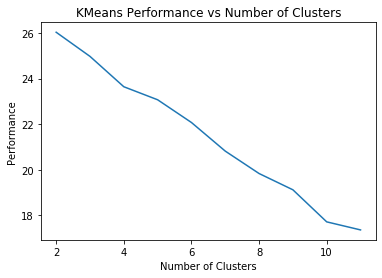

In [95]:
dallas_venues_train = dallas_venues_grouped.drop(['Neighborhood Latitude', 'Neighborhood Longitude'], 1)

KMEANS_scores = [KMeans(n_clusters=i+2, random_state=200).fit(dallas_venues_train).inertia_ for i in range(10)]
plt.plot(np.arange(2,12),KMEANS_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Performance")
plt.title("KMeans Performance vs Number of Clusters")

In [ ]:
plt.savefig('wikipedia_analysis.jpg')

We see the 'elbow' at about 4 and 10 clusters. The performance improves significantly with more than 4 clusters, so we will select 10 clusters as the optimal number.

**KMeans with Cosine Distance**

We can improve the KMeans variance by normalizing our data. This will cause the KMeans algorithm to compute the cosine distance instead of Euclidean distance. In high dimensional datasets, the Euclidean distance is less significant as the values are very close together. We choose to use the cosine distance instead to prevent overfitting.

For the cosine distance adjustment, we see that the bend in the performance happens at k=7.

Text(0.5, 1.0, 'KMeans Performance vs Number of Clusters')

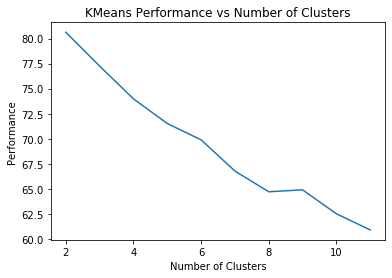

In [65]:
dallas_venues_train_normalized = preprocessing.normalize(dallas_venues_grouped.drop(['Neighborhood Latitude', 'Neighborhood Longitude'], 1))

KMEANS_COS_scores = [KMeans(n_clusters=i+2, random_state=200).fit(dallas_venues_train_normalized).inertia_ for i in range(10)]
plt.plot(np.arange(2,12),KMEANS_COS_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Performance")
plt.title("KMeans Performance vs Number of Clusters")

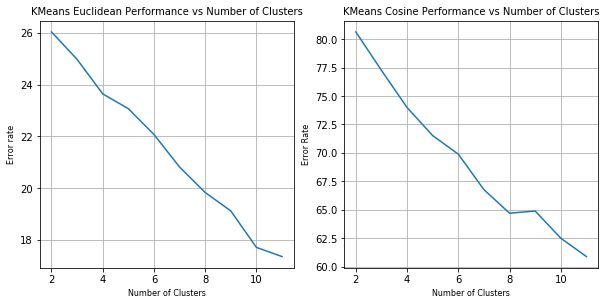

In [101]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel("Number of Clusters", fontsize = 8)
ax.set_ylabel('Error rate', fontsize = 8)
ax.set_title('KMeans Euclidean Performance vs Number of Clusters', fontsize = 10)
ax.plot(np.arange(2,12),KMEANS_scores)
ax.grid()

ax2 = fig.add_subplot(2,2,2) 
ax2.plot(np.arange(2,12),KMEANS_COS_scores)
ax2.set_xlabel("Number of Clusters", fontsize = 8)
ax2.set_ylabel('Error Rate', fontsize = 8)
ax2.set_title('KMeans Cosine Performance vs Number of Clusters', fontsize = 10)
ax2.grid()
plt.savefig('KMeans Clustering.jpg')

From normalizing our data, we see that the optimal number of clusters becomes 7.

<Figure size 432x288 with 0 Axes>

### Model Training

We will train a KMeans algorithm with 10 clusters for the euclidean distance and 7 clusters for the cosine distance

In [66]:
kclusters_euclidean = 10
kmeans_euclidean=KMeans(n_clusters=kclusters_euclidean,random_state=200).fit(dallas_venues_train)

kclusters_cosine = 7
kmeans_cosine = KMeans(n_clusters =kclusters_cosine, random_state=200).fit(dallas_venues_train_normalized)


### Model Evaluation

The silhouette score is a metric that uses the intercluster distance and intracluster distance to measure how well the algorithm separates the information.

In [67]:
print('kmeans: {}'.format(silhouette_score(dallas_venues_train, kmeans_euclidean.labels_, 
                                         metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(dallas_venues_train_normalized,
                                          kmeans_cosine.labels_,
                                          metric='cosine')))

kmeans: 0.28054699580499437
Cosine kmeans:0.1277987565785371


We see that the kmeans algorithm with the euclidean distance performs much better than the cosine distance, but is still not very good.

Next we will perform Principle Component Analysis and visualize the clusters for euclidean and cosine distances.

In [68]:
pca_euclidean = PCA(n_components=2)
principalComponents_cosine = pca_euclidean.fit_transform(dallas_venues_train_normalized)
PCA_cosine = pd.DataFrame(data=principalComponents_cosine, columns=['principal component 1','principal component 2'])

In [69]:
PCA_cosine.insert(2,'cluster cosine',kmeans_cosine.labels_)

In [70]:
PCA_cosine['cluster cosine'].value_counts()

4    25
0    20
6    17
3    13
1     8
2     6
5     5
Name: cluster cosine, dtype: int64

In [71]:
principalComponents_euclidean = pca_euclidean.fit_transform(dallas_venues_train_normalized)
PCA_euclidean= pd.DataFrame(data=principalComponents_euclidean, columns=['principal component 1','principal component 2'])

In [72]:
PCA_euclidean.insert(2,'cluster euclidean',kmeans_euclidean.labels_)

In [73]:
PCA_euclidean['cluster euclidean'].value_counts()

1    80
3     4
8     2
5     2
9     1
7     1
6     1
4     1
2     1
0     1
Name: cluster euclidean, dtype: int64

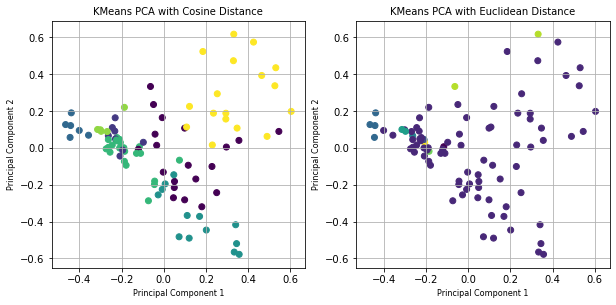

In [117]:
fig = plt.figure(figsize = (10,10))
ax2 = fig.add_subplot(2,2,2) 
ax2.scatter(x =PCA_euclidean['principal component 1'],y= PCA_euclidean['principal component 2'],c=PCA_euclidean['cluster euclidean'])
ax2.set_xlabel('Principal Component 1', fontsize = 8)
ax2.set_ylabel('Principal Component 2', fontsize = 8)
ax2.set_title('KMeans PCA with Euclidean Distance', fontsize = 10)
ax2.grid()
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_title('KMeans PCA with Cosine Distance', fontsize = 10)
ax.scatter(x =PCA_cosine['principal component 1'],y= PCA_cosine['principal component 2'],c=PCA_cosine['cluster cosine'], label=PCA_cosine['cluster cosine'])
ax.grid()



plt.savefig('PCA.jpg')

We'll perform the same cluster analysis with the euclidean distance

### Model Visualization

We will create a new dataframe with the neighborhood name, lat/lng, cluster label and top 10 venues

In [75]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels Cosine',kmeans_cosine.labels_)
neighborhoods_venues_sorted.insert(0,'Cluster Labels Euclidean',kmeans_euclidean.labels_)
neighborhoods_venues_sorted.head()

Cluster Labels Euclidean  Cluster Labels Cosine  Neighborhood Latitude  \
0                         6                      4              32.572580   
1                         1                      0              32.588300   
2                         1                      6              32.589800   
3                         4                      1              32.594994   
4                         1                      4              32.626675   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Farm           Wings Joint        Cosmetics Shop   
1        Breakfast Spot    Mexican Restaurant    Italian Restaurant   
2           Pizza Place            Donut Shop           Gas Station   
3          Soccer Field           Wings Joint          Food Service   
4         Indie Theater       College Theater           Wings Joint   

  4th Most Common Venue 5th Most Common Venue  \
0          Food Service     Food & Drink Shop   
1                  Café                Bakery   
2           Snack Place    Mexican Restaurant   
3                  Food  Fast Food Restaurant   
4            Donut Shop     Food & Drink Shop   

             6th Most Common Venue 7th Most Common Venue  \
0                             Food  Fast Food Restaurant   
1  Southern / Soul Food Restaurant     Electronics Store   
2              Fried Chicken Joint            Restaurant   
3                             Farm           Fabric Shop   
4                             Food  Fast Food Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0           Fabric Shop           Event Space          Event Service   
1          Food Service     Food & Drink Shop                   Food   
2  Fast Food Restaurant    Seafood Restaurant            Fabric Shop   
3           Event Space         Event Service      Electronics Store   
4                  Farm           Fabric Shop            Event Space   

  11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
0      Electronics Store    Dumpling Restaurant            Dry Cleaner   
1   Fast Food Restaurant                   Farm            Fabric Shop   
2            Event Space          Event Service      Electronics Store   
3    Dumpling Restaurant            Dry Cleaner             Donut Shop   
4          Event Service      Electronics Store    Dumpling Restaurant   

  14th Most Common Venue 15th Most Common Venue  
0             Donut Shop                Dog Run  
1            Event Space          Event Service  
2    Dumpling Restaurant            Dry Cleaner  
3                Dog Run        Doctor's Office  
4            Dry Cleaner        Doctor's Office

In [76]:
neighborhoods_venues_sorted.insert(2,'Neighborhood Longitude',dallas_venues_grouped['Neighborhood Longitude'])
neighborhoods_venues_sorted.head()

Cluster Labels Euclidean  Cluster Labels Cosine  Neighborhood Longitude  \
0                         6                      4              -96.744223   
1                         1                      0              -96.955900   
2                         1                      6              -96.856700   
3                         4                      1              -97.046767   
4                         1                      4              -96.762898   

   Neighborhood Latitude 1st Most Common Venue 2nd Most Common Venue  \
0              32.572580                  Farm           Wings Joint   
1              32.588300        Breakfast Spot    Mexican Restaurant   
2              32.589800           Pizza Place            Donut Shop   
3              32.594994          Soccer Field           Wings Joint   
4              32.626675         Indie Theater       College Theater   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Cosmetics Shop          Food Service     Food & Drink Shop   
1    Italian Restaurant                  Café                Bakery   
2           Gas Station           Snack Place    Mexican Restaurant   
3          Food Service                  Food  Fast Food Restaurant   
4           Wings Joint            Donut Shop     Food & Drink Shop   

             6th Most Common Venue 7th Most Common Venue  \
0                             Food  Fast Food Restaurant   
1  Southern / Soul Food Restaurant     Electronics Store   
2              Fried Chicken Joint            Restaurant   
3                             Farm           Fabric Shop   
4                             Food  Fast Food Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0           Fabric Shop           Event Space          Event Service   
1          Food Service     Food & Drink Shop                   Food   
2  Fast Food Restaurant    Seafood Restaurant            Fabric Shop   
3           Event Space         Event Service      Electronics Store   
4                  Farm           Fabric Shop            Event Space   

  11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
0      Electronics Store    Dumpling Restaurant            Dry Cleaner   
1   Fast Food Restaurant                   Farm            Fabric Shop   
2            Event Space          Event Service      Electronics Store   
3    Dumpling Restaurant            Dry Cleaner             Donut Shop   
4          Event Service      Electronics Store    Dumpling Restaurant   

  14th Most Common Venue 15th Most Common Venue  
0             Donut Shop                Dog Run  
1            Event Space          Event Service  
2    Dumpling Restaurant            Dry Cleaner  
3                Dog Run        Doctor's Office  
4            Dry Cleaner        Doctor's Office

In [77]:
Neighborhoods = [dallas_venues[dallas_venues['Neighborhood Latitude'] == lat]['Neighborhood'].iloc[0] for lat in neighborhoods_venues_sorted['Neighborhood Latitude']]
neighborhoods_venues_sorted.insert(0, 'Neighborhoods',Neighborhoods)
neighborhoods_venues_sorted.head()

Neighborhoods  Cluster Labels Euclidean  Cluster Labels Cosine  \
0      Lancaster                         6                      4   
1     Cedar Hill                         1                      0   
2         Desoto                         1                      6   
3  Grand Prairie                         4                      1   
4      Lancaster                         1                      4   

   Neighborhood Longitude  Neighborhood Latitude 1st Most Common Venue  \
0              -96.744223              32.572580                  Farm   
1              -96.955900              32.588300        Breakfast Spot   
2              -96.856700              32.589800           Pizza Place   
3              -97.046767              32.594994          Soccer Field   
4              -96.762898              32.626675         Indie Theater   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Wings Joint        Cosmetics Shop          Food Service   
1    Mexican Restaurant    Italian Restaurant                  Café   
2            Donut Shop           Gas Station           Snack Place   
3           Wings Joint          Food Service                  Food   
4       College Theater           Wings Joint            Donut Shop   

  5th Most Common Venue            6th Most Common Venue  \
0     Food & Drink Shop                             Food   
1                Bakery  Southern / Soul Food Restaurant   
2    Mexican Restaurant              Fried Chicken Joint   
3  Fast Food Restaurant                             Farm   
4     Food & Drink Shop                             Food   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Fast Food Restaurant           Fabric Shop           Event Space   
1     Electronics Store          Food Service     Food & Drink Shop   
2            Restaurant  Fast Food Restaurant    Seafood Restaurant   
3           Fabric Shop           Event Space         Event Service   
4  Fast Food Restaurant                  Farm           Fabric Shop   

  10th Most Common Venue 11th Most Common Venue 12th Most Common Venue  \
0          Event Service      Electronics Store    Dumpling Restaurant   
1                   Food   Fast Food Restaurant                   Farm   
2            Fabric Shop            Event Space          Event Service   
3      Electronics Store    Dumpling Restaurant            Dry Cleaner   
4            Event Space          Event Service      Electronics Store   

  13th Most Common Venue 14th Most Common Venue 15th Most Common Venue  
0            Dry Cleaner             Donut Shop                Dog Run  
1            Fabric Shop            Event Space          Event Service  
2      Electronics Store    Dumpling Restaurant            Dry Cleaner  
3             Donut Shop                Dog Run        Doctor's Office  
4    Dumpling Restaurant            Dry Cleaner        Doctor's Office

**Euclidean Distance**

In [78]:
address = 'Dallas, TX'

geolocator = Nominatim(user_agent="tx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [105]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_euclidean)
ys = [i + x + (i*x)**2 for i in range(kclusters_euclidean)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhoods'], neighborhoods_venues_sorted['Cluster Labels Euclidean']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters.save('Euclidean Clustering.png')
map_clusters

### Cosine Distance

In [80]:
address = 'Dallas, TX'

geolocator = Nominatim(user_agent="tx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [106]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_cosine)
ys = [i + x + (i*x)**2 for i in range(kclusters_cosine)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhoods'], neighborhoods_venues_sorted['Cluster Labels Cosine']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters.save('Cosine Clustering.png')
map_clusters

Here we can see how the cosine and euclidean distances effect the performance of the algorithm. In the case of the euclidean distances, we see that a majority of the neighborhoods are classified in cluster 2. 

## <section id=four>[4. Results](#home 'Return to TOC')</section>

Although we see the performance of the silhouette score drop from applying normalization to our data, we see that the clusters created from this adjustment have a lower bias compared to the euclidean distance.

From the visualization, we see that the clustering algorithm performed fairly well at separating the different neighborhoods. 

We will analyze the 2 largest clusters, Cluster 1 and cluster 5, and find similarities within these neighborhoods in terms of the venues. 

In [82]:
CLUSTERS = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels Euclidean']== 1,:]

In [83]:
CLUSTERS.head(10)

Neighborhoods  Cluster Labels Euclidean  Cluster Labels Cosine  \
1              Cedar Hill                         1                      0   
2                  Desoto                         1                      6   
4               Lancaster                         1                      4   
7             Duncanville                         1                      6   
8                  Dallas                         1                      0   
9           Grand Prairie                         1                      4   
11                 Dallas                         1                      0   
13                 Dallas                         1                      6   
15                 Dallas                         1                      0   
17  Balch SpringsMesquite                         1                      6   

    Neighborhood Longitude  Neighborhood Latitude 1st Most Common Venue  \
1               -96.955900              32.588300        Breakfast Spot   
2               -96.856700              32.589800           Pizza Place   
4               -96.762898              32.626675         Indie Theater   
7               -96.908200              32.651700          Home Service   
8               -96.839232              32.657741     Convenience Store   
9               -97.011879              32.658888                  Food   
11              -96.874226              32.662318   Fried Chicken Joint   
13              -97.087158              32.673948  Fast Food Restaurant   
15              -96.874206              32.708286    Mexican Restaurant   
17              -96.612854              32.719243  Fast Food Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1     Mexican Restaurant    Italian Restaurant                  Café   
2             Donut Shop           Gas Station           Snack Place   
4        College Theater           Wings Joint            Donut Shop   
7     Italian Restaurant        Cosmetics Shop        Sandwich Place   
8               Pharmacy             Pawn Shop      Department Store   
9            Wings Joint        Cosmetics Shop          Food Service   
11           Wings Joint           Gas Station           Pizza Place   
13                 Hotel           Gas Station   Rental Car Location   
15      Storage Facility            Taco Place     Electronics Store   
17    Seafood Restaurant   Fried Chicken Joint        Discount Store   

   5th Most Common Venue            6th Most Common Venue  \
1                 Bakery  Southern / Soul Food Restaurant   
2     Mexican Restaurant              Fried Chicken Joint   
4      Food & Drink Shop                             Food   
7   Fast Food Restaurant                     Burger Joint   
8                   Food                      Pizza Place   
9      Food & Drink Shop             Fast Food Restaurant   
11      Department Store                      Coffee Shop   
13           Coffee Shop                   Sandwich Place   
15           Wings Joint                     Food Service   
17           Gas Station              Arts & Crafts Store   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1      Electronics Store          Food Service     Food & Drink Shop   
2             Restaurant  Fast Food Restaurant    Seafood Restaurant   
4   Fast Food Restaurant                  Farm           Fabric Shop   
7           Soccer Field             Pet Store    Mexican Restaurant   
8           Dance Studio            Donut Shop  Fast Food Restaurant   
9                   Farm           Fabric Shop           Event Space   
11        Discount Store            Restaurant            Nail Salon   
13            Nail Salon    Mexican Restaurant   Fried Chicken Joint   
15                  Food  Fast Food Restaurant                  Farm   
17      Asian Restaurant           Wings Joint                  Food   

   10th Most Common Venue 11th Most Common Venue 12th Most Common Ven

In [84]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters =7
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(CLUSTERS['Neighborhood Latitude'], CLUSTERS['Neighborhood Longitude'], CLUSTERS['Neighborhoods'], CLUSTERS['Cluster Labels Euclidean']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

**First Cluster**

In [85]:
CLUSTERS.head()

Neighborhoods  Cluster Labels Euclidean  Cluster Labels Cosine  \
1    Cedar Hill                         1                      0   
2        Desoto                         1                      6   
4     Lancaster                         1                      4   
7   Duncanville                         1                      6   
8        Dallas                         1                      0   

   Neighborhood Longitude  Neighborhood Latitude 1st Most Common Venue  \
1              -96.955900              32.588300        Breakfast Spot   
2              -96.856700              32.589800           Pizza Place   
4              -96.762898              32.626675         Indie Theater   
7              -96.908200              32.651700          Home Service   
8              -96.839232              32.657741     Convenience Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1    Mexican Restaurant    Italian Restaurant                  Café   
2            Donut Shop           Gas Station           Snack Place   
4       College Theater           Wings Joint            Donut Shop   
7    Italian Restaurant        Cosmetics Shop        Sandwich Place   
8              Pharmacy             Pawn Shop      Department Store   

  5th Most Common Venue            6th Most Common Venue  \
1                Bakery  Southern / Soul Food Restaurant   
2    Mexican Restaurant              Fried Chicken Joint   
4     Food & Drink Shop                             Food   
7  Fast Food Restaurant                     Burger Joint   
8                  Food                      Pizza Place   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1     Electronics Store          Food Service     Food & Drink Shop   
2            Restaurant  Fast Food Restaurant    Seafood Restaurant   
4  Fast Food Restaurant                  Farm           Fabric Shop   
7          Soccer Field             Pet Store    Mexican Restaurant   
8          Dance Studio            Donut Shop  Fast Food Restaurant   

  10th Most Common Venue 11th Most Common Venue 12th Most Common Venue  \
1                   Food   Fast Food Restaurant                   Farm   
2            Fabric Shop            Event Space          Event Service   
4            Event Space          Event Service      Electronics Store   
7                   Bank       Asian Restaurant               Pharmacy   
8                   Farm            Fabric Shop            Event Space   

  13th Most Common Venue 14th Most Common Venue 15th Most Common Venue  
1            Fabric Shop            Event Space          Event Service  
2      Electronics Store    Dumpling Restaurant            Dry Cleaner  
4    Dumpling Restaurant            Dry Cleaner        Doctor's Office  
7    American Restaurant          Grocery Store        Doctor's Office  
8          Event Service      Electronics Store    Dumpling Restaurant

In [86]:
unique_values_by_column =[]
for i in range(len(CLUSTERS.columns[4:])):
    current_column = CLUSTERS.columns[i+4]
    current_dict = CLUSTERS[current_column].value_counts().to_dict()
    unique_values_by_column.append(current_dict)

total_unique = Counter(unique_values_by_column[0])
for i in range(1,len(unique_values_by_column)):
    total_unique += Counter(unique_values_by_column[i])
print (total_unique)

Counter({'Fast Food Restaurant': 59, 'Event Service': 55, 'Event Space': 55, 'Electronics Store': 52, 'Fabric Shop': 51, 'Farm': 50, 'Dumpling Restaurant': 47, 'Food': 41, 'Dry Cleaner': 40, 'Donut Shop': 37, 'Mexican Restaurant': 34, 'Wings Joint': 34, 'Food & Drink Shop': 22, 'Coffee Shop': 20, 'Convenience Store': 19, 'Sandwich Place': 19, 'Dog Run': 17, 'American Restaurant': 14, 'Fried Chicken Joint': 13, 'Pizza Place': 13, 'Hotel': 12, 'Pharmacy': 12, 'Park': 11, 'Gas Station': 11, 'Bar': 10, 'Gym': 10, 'Discount Store': 10, 'Seafood Restaurant': 10, 'Italian Restaurant': 10, 'Burger Joint': 10, 'BBQ Joint': 9, "Doctor's Office": 9, 'Bank': 9, 'Dessert Shop': 8, 'Steakhouse': 8, 'Taco Place': 8, 'Home Service': 7, 'Rental Car Location': 7, 'Chinese Restaurant': 7, 'Café': 7, 'Restaurant': 7, 'Recreation Center': 6, 'Food Service': 6, 'Gym / Fitness Center': 6, 'Clothing Store': 6, 'Gift Shop': 6, 'Bakery': 6, 'Furniture / Home Store': 5, 'Grocery Store': 5, 'Cosmetics Shop': 5, '

We'll a create a function that takes in the dataframe and returns a new dataframe with the total count of unique restaurant catagories.

In [87]:
def find_unique(dataframe):
    unique_values_by_column =[]
    for i in range(len(dataframe.columns[5:])):
        current_column = dataframe.columns[i+5]
        current_dict = dataframe[current_column].value_counts().to_dict()
        unique_values_by_column.append(current_dict)

    total_unique = Counter(unique_values_by_column[0])
    for i in range(1,len(unique_values_by_column)):
        total_unique += Counter(unique_values_by_column[i])
        
    return pd.DataFrame(total_unique, index=['Count']).T.sort_values(by=['Count'], ascending=False)
    

In [88]:
cluster1_restaurants = find_unique(CLUSTERS)

In [89]:
cluster1_restaurants.head()

Count
Fast Food Restaurant     59
Event Space              55
Event Service            55
Electronics Store        52
Fabric Shop              51

Next we will visualize the newly generated dataframe with a barplot

Text(0.5, 1.0, 'Unique restaurants in Cluster 1')

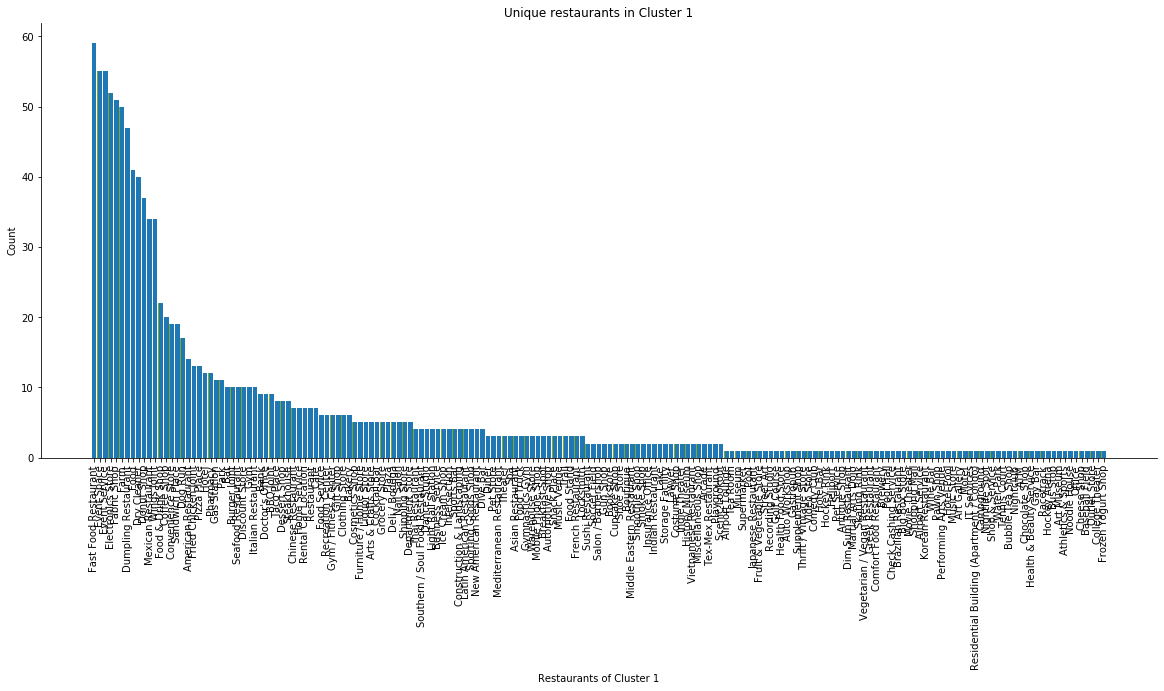

In [90]:
fig, ax = plt.subplots(figsize=(20,8))
numcategories = np.arange(len(cluster1_restaurants.index))
w= 0.25
plt_commercial =  ax.bar(numcategories-4*w/3, cluster1_restaurants['Count'], width=w, color=['#7caa2d'],label=community_catagories[0],align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(numcategories,cluster1_restaurants.index, rotation='vertical')
ax.bar(cluster1_restaurants.index.values.tolist(), cluster1_restaurants['Count'])
plt.xlabel('Restaurants of Cluster 1')
plt.ylabel('Count')
plt.title('Unique restaurants in Cluster 1')

We'll create a function that takes in a cluster dataframe and plot out the unique restaurants.

In [112]:
def plot_cluster(cluster, cluster_number='', top_num =15):
    cluster_restaurants = find_unique(cluster).head(top_num)
    counts = cluster_restaurants['Count']
    catagories = cluster_restaurants.index.values.tolist()
    fig, ax = plt.subplots(figsize=(20,8))
    max_value = np.arange(cluster_restaurants.index.size)
    ax.barh(max_value,counts.tolist())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(np.arange(cluster_restaurants['Count'].max()+1))
    ax.set_yticks(np.arange(len(catagories)))
    ax.set_yticklabels(catagories)
    plt.ylabel('Venues of Cluster '+str(cluster_number))
    plt.xlabel('Count')
    plt.title(str(top_num)+' Most Popular venues in Cluster '+str(cluster_number)) 
    plt.savefig('PopularVenues.png')


We can see that both of these clusters actually contain the similar restaurants, which is supporting evidence of the original model (euclidean distance) being correct in clustering a majority of the neighborhoods into 1 cluster. 

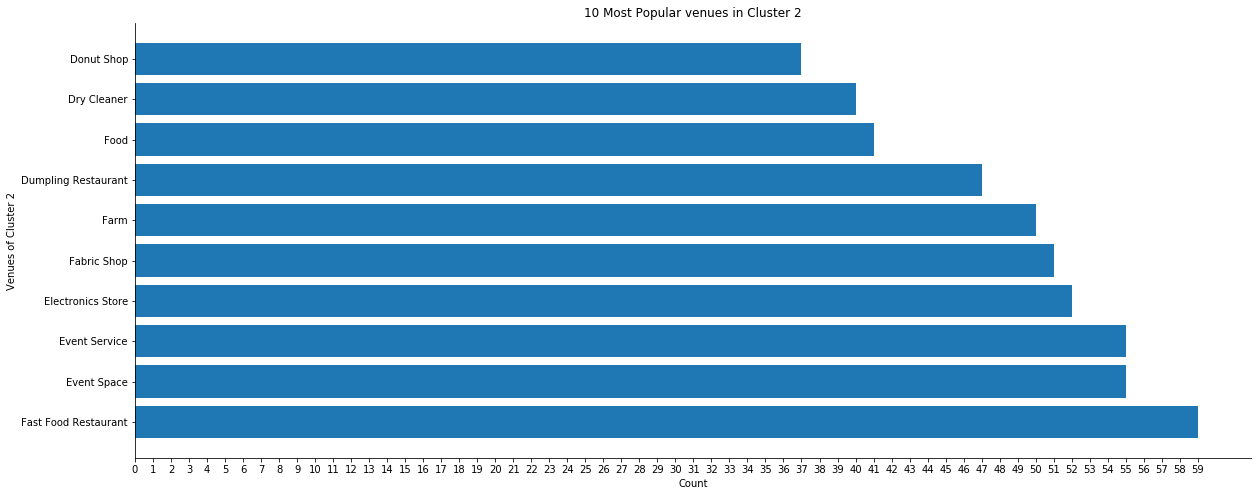

In [113]:
cluster2_euclidean = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels Euclidean'] == 1,:]
plot_cluster(cluster2_euclidean,2,10)

## <section id=five>[5. Discussion](#home 'Return to TOC')</section>

The KMeans Clustering algorithm's performance was not very good, ~.28 silhouette score and performance worsened when adding cosine distance. The performance of the algorithm could be improved if we had more training samples for the model. The model has 15 features and only about 90 training samples. Reducing the number of features may improve the performance of the algorithm, but if we extend the data set to other cities in Texas, the extra features may be useful to distinguish the neighborhoods.

## <section id=six> [6. Conclusion](#home 'Return to TOC')</section>